## Notebook de demonstração para o módulo integração

In [2]:
#Bloco de configuração para importar o módulo de um diretório pai
import sys
import os
notebook_dir = os.getcwd()
project_root = os.path.abspath(os.path.join(notebook_dir, '..'))
if project_root not in sys.path:
    sys.path.append(project_root)

In [9]:
from CB2325NumericaG07.integracao import integral_trapezio, integral_simpson38, integral_de_montecarlo, integral_boole, integral_gauss_legendre
from CB2325NumericaG07.erros import erro_absoluto, erro_relativo
from CB2325NumericaG07.interpolacao import diff_numerica
import sympy as sp

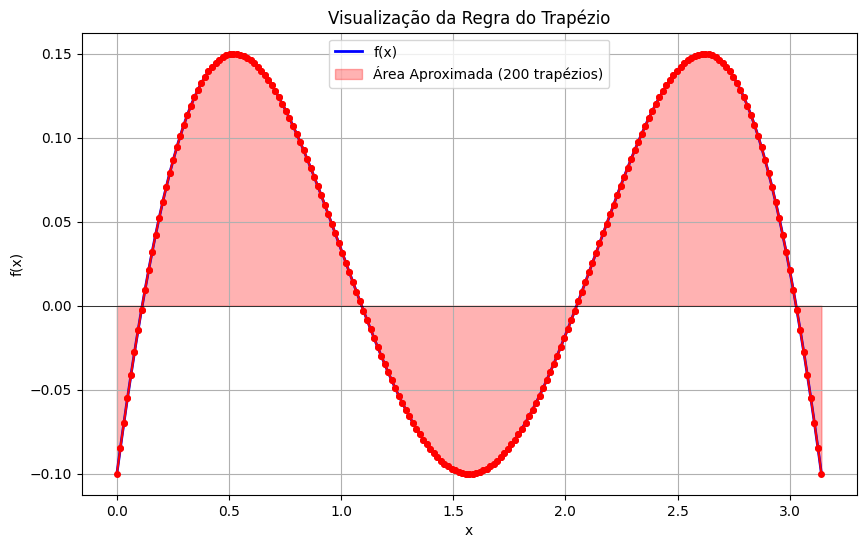

Resultado da integração de sin^2(x) de 0 a pi com n=200: 0.11500328432533863
Valor exato da integração: 0.115044407846124
Erro absoluto: 0.0000411235207851551
Erro relativo: 0.000357457798732463


In [4]:
x = sp.Symbol('x')
f = sp.sin(x)+(sp.cos(x))**2 - 1.1

a = 0
b = sp.pi
n = 200

resultado = integral_trapezio(f, a, b, n, True)
print(f"Resultado da integração de sin^2(x) de 0 a pi com n={n}: {resultado}")

# Comparação com o valor exato
valor_exato = sp.integrate(f, (x, a, b))
print(f"Valor exato da integração: {valor_exato.evalf()}")

erro = erro_absoluto(valor_exato.evalf(), resultado)
print(f"Erro absoluto: {erro}")
erro_rel = erro_relativo(valor_exato.evalf(), resultado)
print(f"Erro relativo: {erro_rel}")

Calculando a integral de f(x) = exp(x**2) de 0 a 2 com n=12 usando Simpson 3/8...


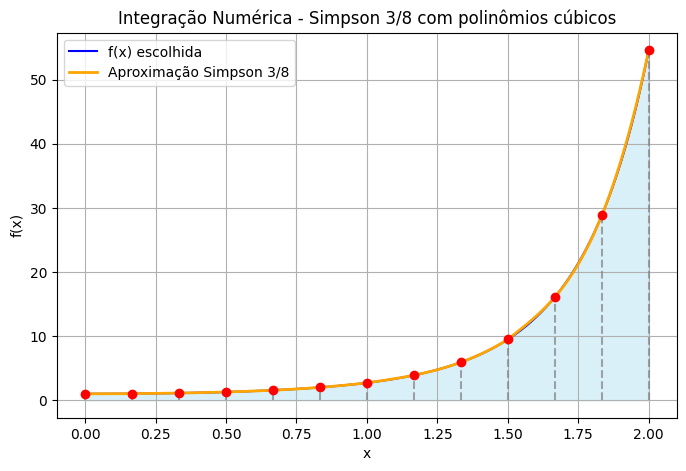

Resultado da integração (Simpson 3/8): 16.49168257653112
Valor 'exato' da integração (SymPy): 16.4526277655072
Erro absoluto: 0.0390548110238882
Erro relativo: 0.00237377345312377


In [5]:
import sympy as sp
import numpy as np

# --- 1. Definição Simbólica (para SymPy) ---
x = sp.Symbol('x')
# Esta é a EXPRESSÃO simbólica para o cálculo exato
f_simbolica = sp.exp(x**2)

# --- 2. Definição Numérica (para Simpson 3/8) ---
def f_numerica(x_val):
    # Esta é a FUNÇÃO numérica, que usa np.exp do NumPy
    # para retornar valores numéricos (floats ou arrays)
    return np.exp(x_val**2)

# --- Parâmetros ---
a = 0
b = 2
n = 12

# Use a expressão simbólica no print para mostrar a fórmula correta
print(f"Calculando a integral de f(x) = {f_simbolica} de {a} a {b} com n={n} usando Simpson 3/8...")

# --- Cálculo Numérico ---
# Use a FUNÇÃO NUMÉRICA (f_numerica) aqui.
# OBS: As linhas abaixo estão comentadas porque 'integral_simpson38',
# 'erro_absoluto', e 'erro_relativo' não foram definidas neste script.
# Você deve descomentá-las quando tiver essas funções disponíveis/importadas.

resultado = integral_simpson38(f_numerica, a, b, n, plotar=True)
print(f"Resultado da integração (Simpson 3/8): {resultado}")


# --- Cálculo Simbólico (Exato) ---
# Use a EXPRESSÃO SIMBÓLICA (f_simbolica) aqui.
valor_exato = sp.integrate(f_simbolica, (x, a, b))
valor_exato_num = valor_exato.evalf()
print(f"Valor 'exato' da integração (SymPy): {valor_exato_num}")

# --- Cálculo de Erro ---
# (Também comentado, pois depende da variável 'resultado')
erro_abs = erro_absoluto(valor_exato_num, resultado)
print(f"Erro absoluto: {erro_abs}")
erro_rel = erro_relativo(valor_exato_num, resultado)
print(f"Erro relativo: {erro_rel}")

Valor calculado pela integral de montecarlo com 100 pontos: 3.08
valor mais proximo 3.141592653589793
Erro absoluto: 0.061592653589793045
Erro relativo 0.019997614801880857

Agora vamos aumentar a quantidade de pontos e ver como a precisão aumenta.

Com 10e2 pontos o resultado foi: 2.8 , com erro absoluto 0.3416 e erro relativo 0.1220
Com 10e3 pontos o resultado foi: 3.168 , com erro absoluto 0.0264 e erro relativo 0.0083
Com 10e4 pontos o resultado foi: 3.1356 , com erro absoluto 0.0060 e erro relativo 0.0019
Com 10e5 pontos o resultado foi: 3.1408 , com erro absoluto 0.0008 e erro relativo 0.0003
Com 10e6 pontos o resultado foi: 3.1418 , com erro absoluto 0.0002 e erro relativo 0.0001
Com 10e7 pontos o resultado foi: 3.1418848 , com erro absoluto 0.0003 e erro relativo 0.0001


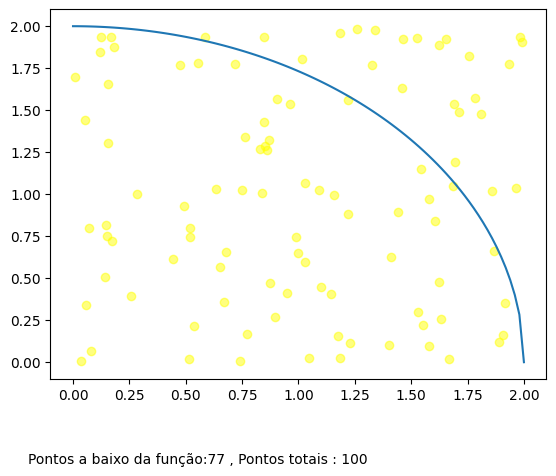

In [6]:
#vamos calcular pi 
import numpy as np

#função que usaremos para integrar
f = lambda x: (4 - x**2)**0.5

#resultado esperado: pi/4 * 2^2 = pi

#resultado da integral com a função f de 0 a 2.
result = integral_de_montecarlo(f,0,2,plot =True)

#printando os resultados
print(f'Valor calculado pela integral de montecarlo com 100 pontos: {result}')
print(f'valor mais proximo {np.pi}')
#printando os erros
print(f'Erro absoluto: {erro_absoluto(result,np.pi)}')
print(f'Erro relativo {erro_relativo(result,np.pi)}')

print()
print('Agora vamos aumentar a quantidade de pontos e ver como a precisão aumenta.')
print()

#um loop para calcular como a função se comporta para o crecimento da quantidade de pontos
for i in range(2,8):
    t_result = integral_de_montecarlo(f,0,2,qte=10**i)
    print(f'Com {10}e{i} pontos o resultado foi: {t_result} , com erro absoluto {erro_absoluto(t_result,np.pi):.4f} e erro relativo {erro_relativo(t_result,np.pi):.4f}')


Calculando a integral de f(x) = exp(x)*sin(x) no intervalo [0, 3] com n=12 usando a Regra de Boole...



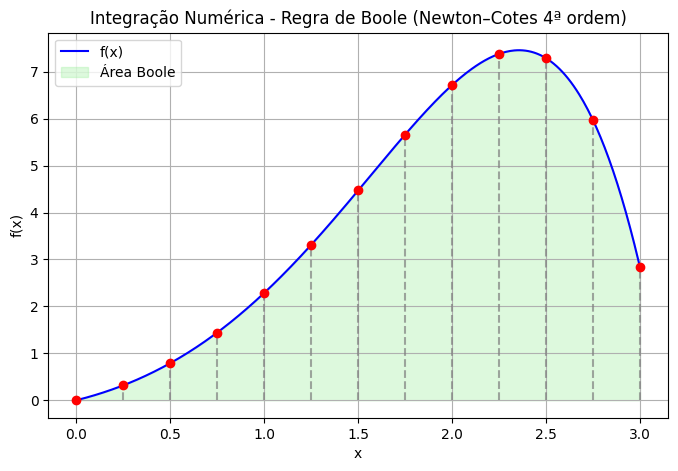

Resultado numérico (Regra de Boole): 11.859534954880337
Valor exato da integral (via SymPy): 11.8595009883170
Erro absoluto: 0.0000339665633397601
Erro relativo: 0.00000286408031612976


In [10]:
import sympy as sp
import numpy as np

# --- 1. Definição simbólica ---
x = sp.Symbol('x')
f_simbolica = sp.sin(x) * sp.exp(x)   # exemplo: f(x) = e^x * sin(x)

# --- 2. Função numérica ---
def f_numerica(x_val):
    return np.sin(x_val) * np.exp(x_val)

# --- Parâmetros da integral ---
a = 0
b = 3
n = 12   # deve ser múltiplo de 4

print(f"Calculando a integral de f(x) = {f_simbolica} no intervalo [{a}, {b}] com n={n} usando a Regra de Boole...\n")

# --- 3. Cálculo numérico ---
resultado = integral_boole(f_numerica, a, b, n, plotar=True)
print(f"Resultado numérico (Regra de Boole): {resultado}")

# --- 4. Cálculo exato ---
valor_exato = sp.integrate(f_simbolica, (x, a, b)).evalf()
print(f"Valor exato da integral (via SymPy): {valor_exato}")

# --- 5. Erros ---
erro_abs = erro_absoluto(valor_exato, resultado)
erro_rel = erro_relativo(valor_exato, resultado)

print(f"Erro absoluto: {erro_abs}")
print(f"Erro relativo: {erro_rel}")


Calculando a integral de f(x) = exp(-x**2) no intervalo [0, 2] usando Gauss–Legendre com n=4 pontos...



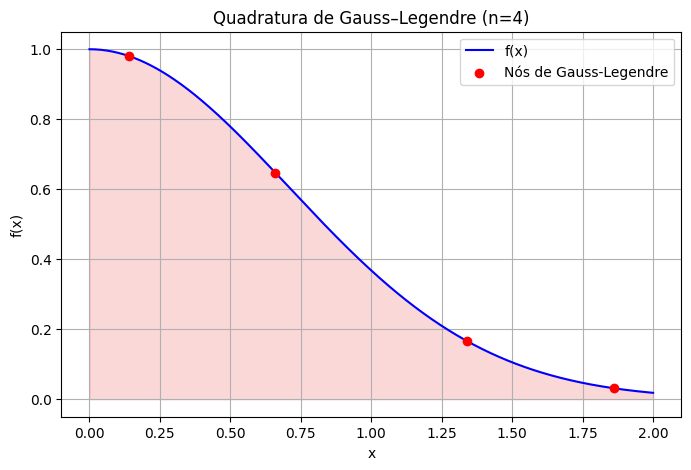

Resultado numérico (Gauss–Legendre, n=4 pontos): 0.8822290959326039
Valor exato da integral (via SymPy): 0.882081390762422
Erro absoluto: 0.000147705170182255
Erro relativo: 0.000167450727029381


In [11]:
import sympy as sp
import numpy as np

# --- 1. Definição simbólica ---
x = sp.Symbol('x')
f_simbolica = sp.exp(-x**2)   # Exemplo clássico: função gaussiana

# --- 2. Função numérica ---
def f_numerica(x_val):
    return np.exp(-x_val**2)

# --- Parâmetros ---
a = 0
b = 2
n = 4   # número de pontos da quadratura (quanto maior, mais preciso)

print(f"Calculando a integral de f(x) = {f_simbolica} no intervalo [{a}, {b}] usando Gauss–Legendre com n={n} pontos...\n")

# --- 3. Cálculo numérico ---
resultado = integral_gauss_legendre(f_numerica, a, b, n=n, plotar=True)
print(f"Resultado numérico (Gauss–Legendre, n={n} pontos): {resultado}")

# --- 4. Cálculo exato (via SymPy) ---
valor_exato = sp.integrate(f_simbolica, (x, a, b)).evalf()
print(f"Valor exato da integral (via SymPy): {valor_exato}")

# --- 5. Erros ---
erro_abs = erro_absoluto(valor_exato, resultado)
erro_rel = erro_relativo(valor_exato, resultado)

print(f"Erro absoluto: {erro_abs}")
print(f"Erro relativo: {erro_rel}")
